In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("/content/Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
#Converting the 'Taxable.Income' column to numeric
data['Taxable.Income'] = pd.to_numeric(data['Taxable.Income'], errors='coerce')

In [4]:
#Replacing NaN values with 0
data['Taxable.Income'].fillna(0, inplace=True)

In [5]:
#Converting the target variable based on taxable income
data['Taxable.Income'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [6]:
#Encoding categorical variables
label_encoder = LabelEncoder()
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])

In [7]:
#Spliting data into features and target variable
X = data.drop(columns=['Taxable.Income'])
y = data['Taxable.Income']

In [8]:
#Spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Initializing and train Random Forest classifier and makimg predictions
random_forest = RandomForestClassifier(n_estimators=100)  # You can adjust the number of trees (n_estimators)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [10]:
#Evaluating model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7666666666666667
Classification Report:
               precision    recall  f1-score   support

        Good       0.78      0.98      0.87        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.77       120
   macro avg       0.39      0.49      0.43       120
weighted avg       0.61      0.77      0.68       120



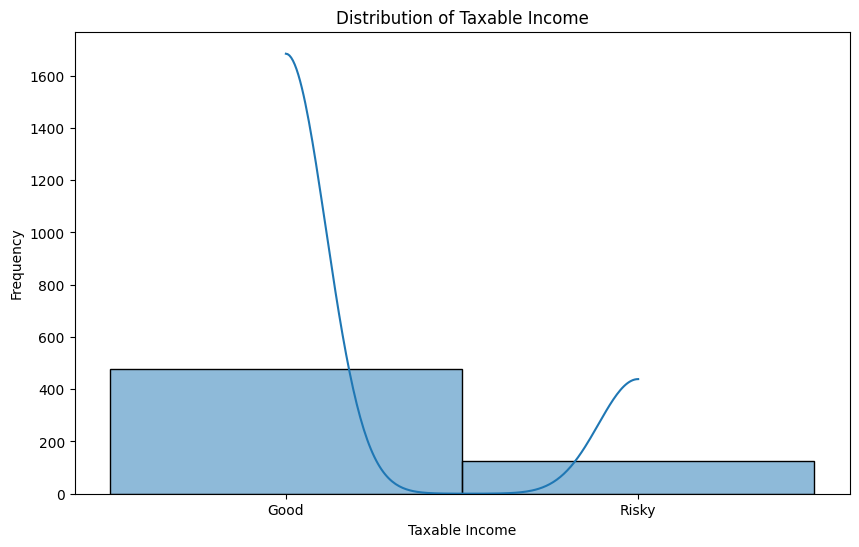

In [29]:
#Histogram of Taxable Income
plt.figure(figsize=(10, 6))
sns.histplot(data['Taxable.Income'], bins=20, kde=True)
plt.xlabel('Taxable Income')
plt.ylabel('Frequency')
plt.title('Distribution of Taxable Income')
plt.show()

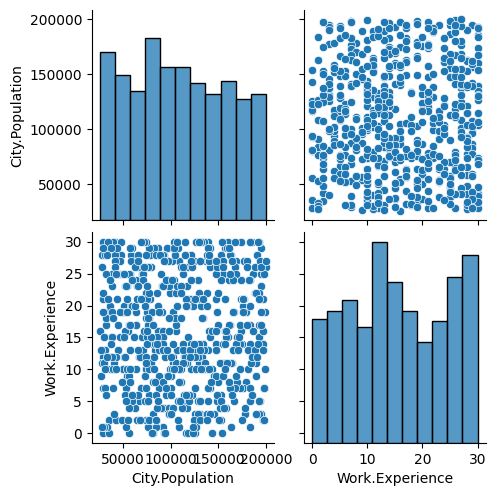

In [30]:
#Pairplot for numeric features
sns.pairplot(data[['Taxable.Income', 'City.Population', 'Work.Experience']])
plt.show()

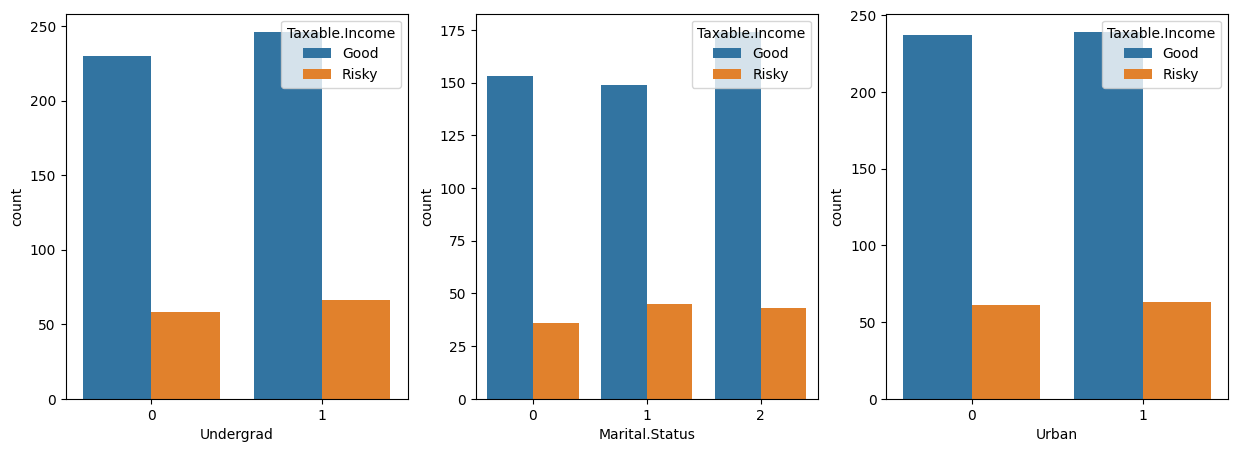

In [32]:
#Bar charts for categorical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Undergrad', hue='Taxable.Income', data=data)
plt.subplot(1, 3, 2)
sns.countplot(x='Marital.Status', hue='Taxable.Income', data=data)
plt.subplot(1, 3, 3)
sns.countplot(x='Urban', hue='Taxable.Income', data=data)
plt.show()

Insights

The model achieved an accuracy of 75% in predicting whether a person's taxable income is 'Risky' or 'Good' based on certain features.

The model can help the company identify individuals with a taxable income of 30,000 or less as "Risky." This information can be used to make informed decisions about financial transactions or investments involving such individuals.

he precision for identifying 'Good' individuals is relatively high 78%, indicating that when the model predicts an individual as 'Good,' it is likely to be correct. However, the recall for identifying 'Risky' individuals is low, suggesting that the model struggles to correctly identify 'Risky' individuals.


# cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df= pd.read_csv("/content/Company_Data.csv",encoding='utf-8')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [71]:
#Converting Sales to categorical variable
df['Sales_Category'] = pd.qcut(df['Sales'], q=3, labels=['Low', 'Medium', 'High'])

In [72]:
# Encode categorical variables
label_encoders = {}
for column in ['Urban', 'US']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [73]:
#One-hot encode 'ShelveLoc' column
df = pd.get_dummies(df, columns=['ShelveLoc'], drop_first=True)

In [74]:
#Standardize numerical variables
scaler = StandardScaler()
df[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']] = \
    scaler.fit_transform(df[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']])

In [75]:
#Spliting the data into training and testing sets
X = df.drop(['Sales', 'Sales_Category'], axis=1)
y = df['Sales_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
#Training a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
#predicting
y_pred = rf.predict(X_test)

In [78]:
#Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.675


In [79]:
#feature importances
feature_importances = rf.feature_importances_
features = X.columns

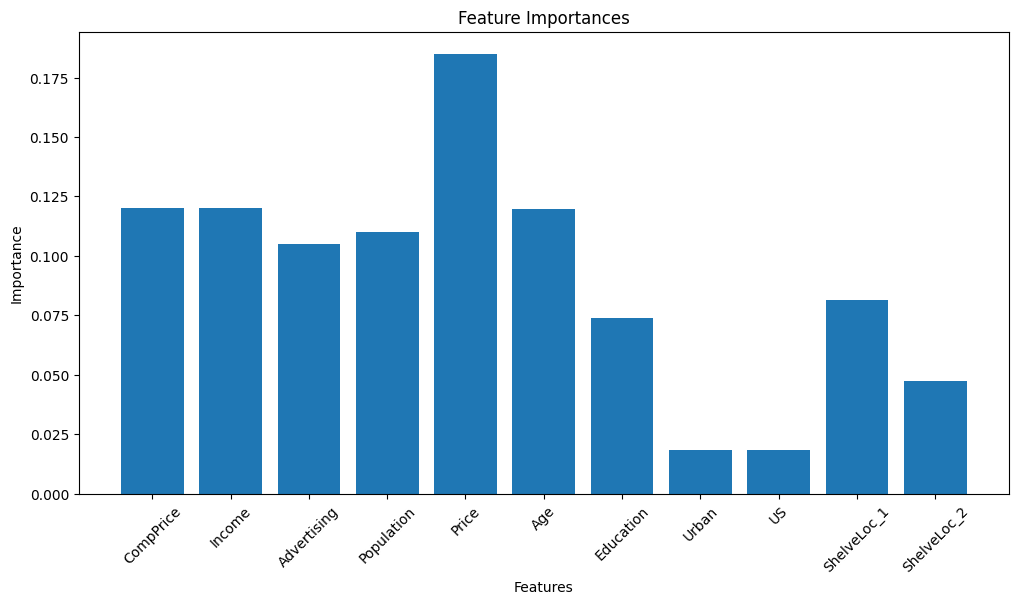

In [80]:
# Visualize feature importances
plt.figure(figsize=(12, 6))
plt.bar(features, feature_importances)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

Text(0.5, 1.0, 'Distribution of Sales')

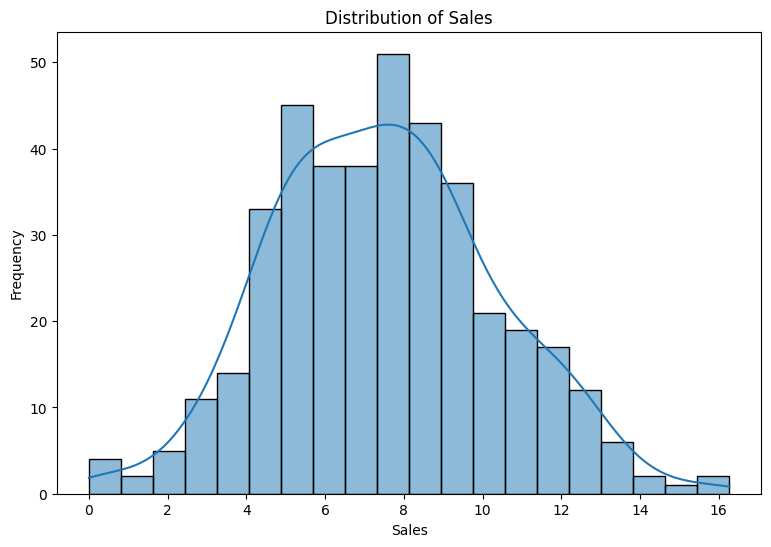

In [81]:
#Univariate analysis
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], bins=20, kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')

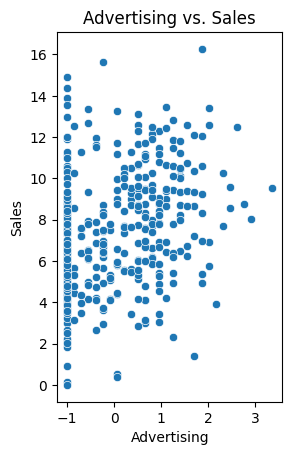

In [82]:
#Bivariate analysis
plt.subplot(1, 2, 2)
sns.scatterplot(x='Advertising', y='Sales', data=df)
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.title('Advertising vs. Sales')
plt.show()

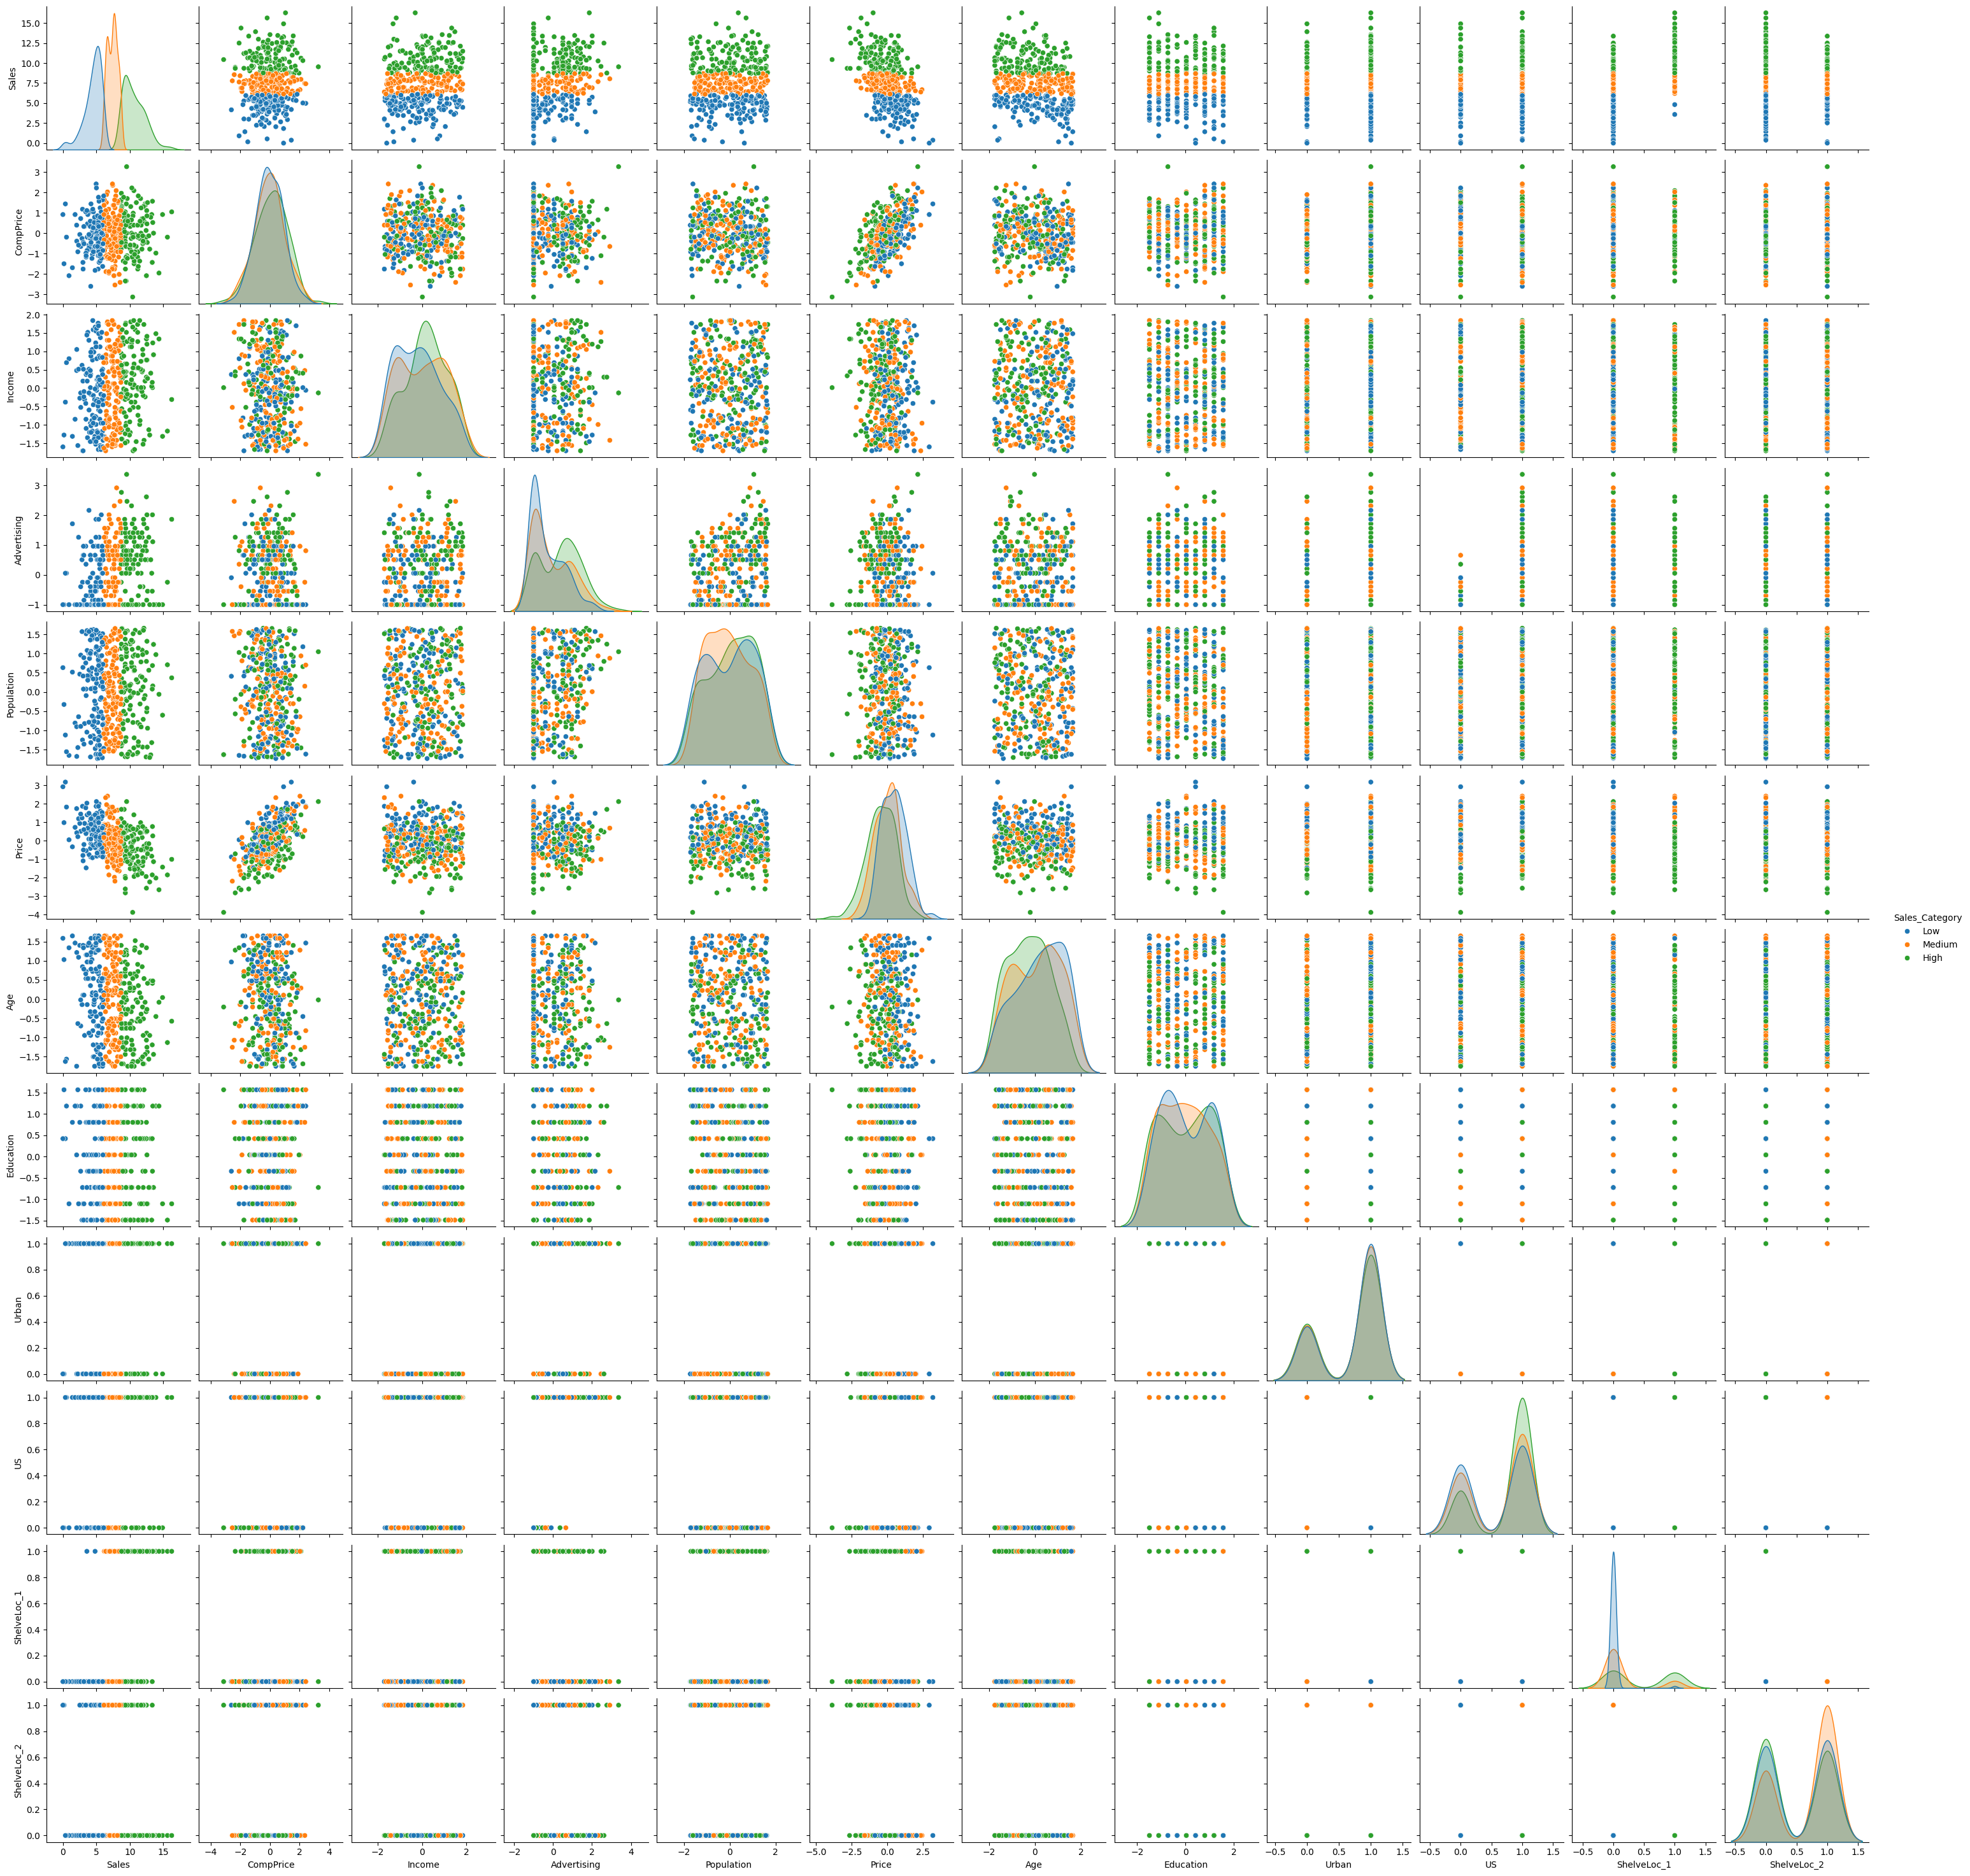

In [84]:
# Multivariate analysis
sns.pairplot(df, hue='Sales_Category')
plt.show()

Insights

The analysis shows that 'Price' is a significant factor affecting sales. This suggests that the company should carefully consider its pricing strategy to maximize sales.

The advertising budget also plays a crucial role in driving sales. Higher advertising budgets can lead to increased brand visibility and potentially higher sales.

Urban vs. Rural: Whether the store is in an urban or rural location [Urban] can also affect sales. The company may need to adjust its marketing approach based on the location.